In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [140]:
df = pd.read_csv("TikTok_songs_2022.csv")

In [141]:
df.shape

(263, 18)

In [142]:
df.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

## Visualization

In [145]:
colors = ["#09101F","#72DDF7", '#F7AEF8']

In [146]:
def hist(df, x, ax, main_color=colors[1], second_color=colors[0], bins=30):
    sns.histplot(
        data=df,
        x=x,
        bins=bins,
        ax=ax,
        kde=True,
        color=main_color,
        edgecolor=second_color,
        line_kws={"linestyle": '--'},
        linewidth=3
    )

    ax.lines[0].set_color(second_color)
    ax.grid(axis='y', linewidth=0.3, color='black')
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

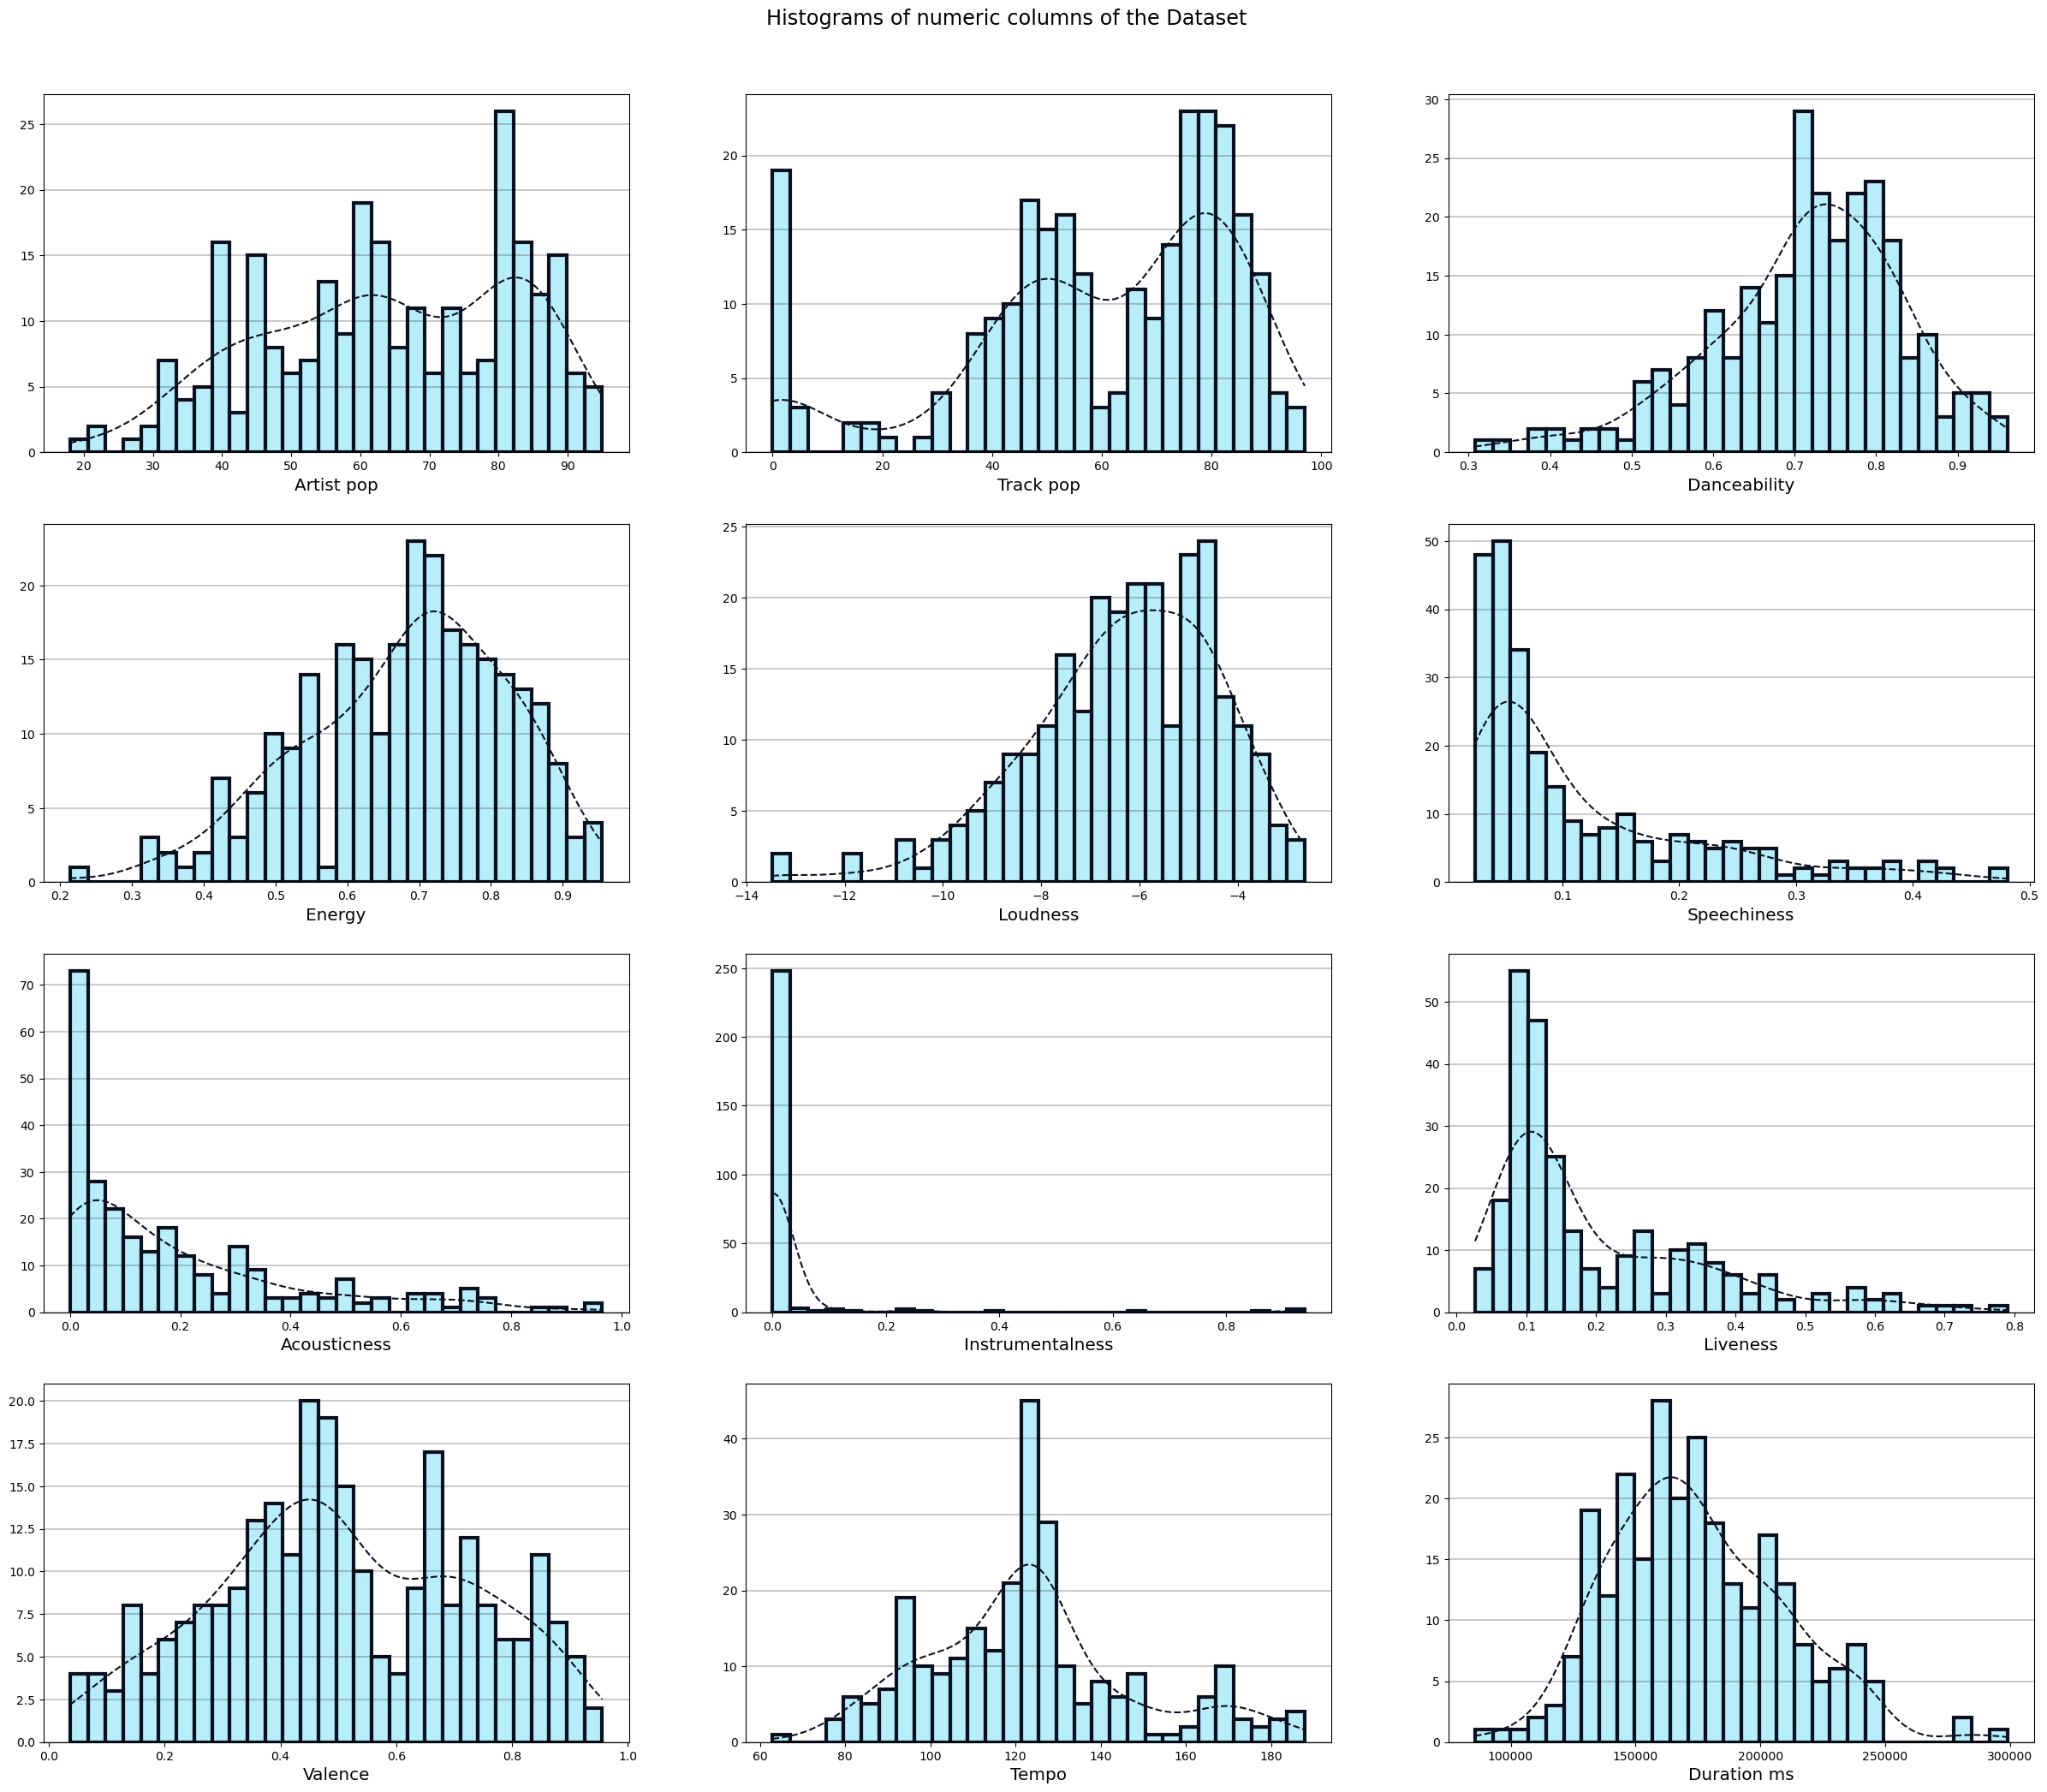

In [147]:
cols = ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(4, 3, figsize=(30, 25))

for i, col in enumerate(cols):
    row_index = i // 3
    col_index = i % 3
    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.92)
plt.show()

In [148]:
def count(df, x, ax, main_color=colors[2], second_color=colors[0]):
    ax.bar(df[x].value_counts().index, 
           df[x].value_counts().values,
           color=main_color, 
           edgecolor=second_color, 
           linewidth=3)
    ax.grid(axis='y', linewidth=0.3, color='black')
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

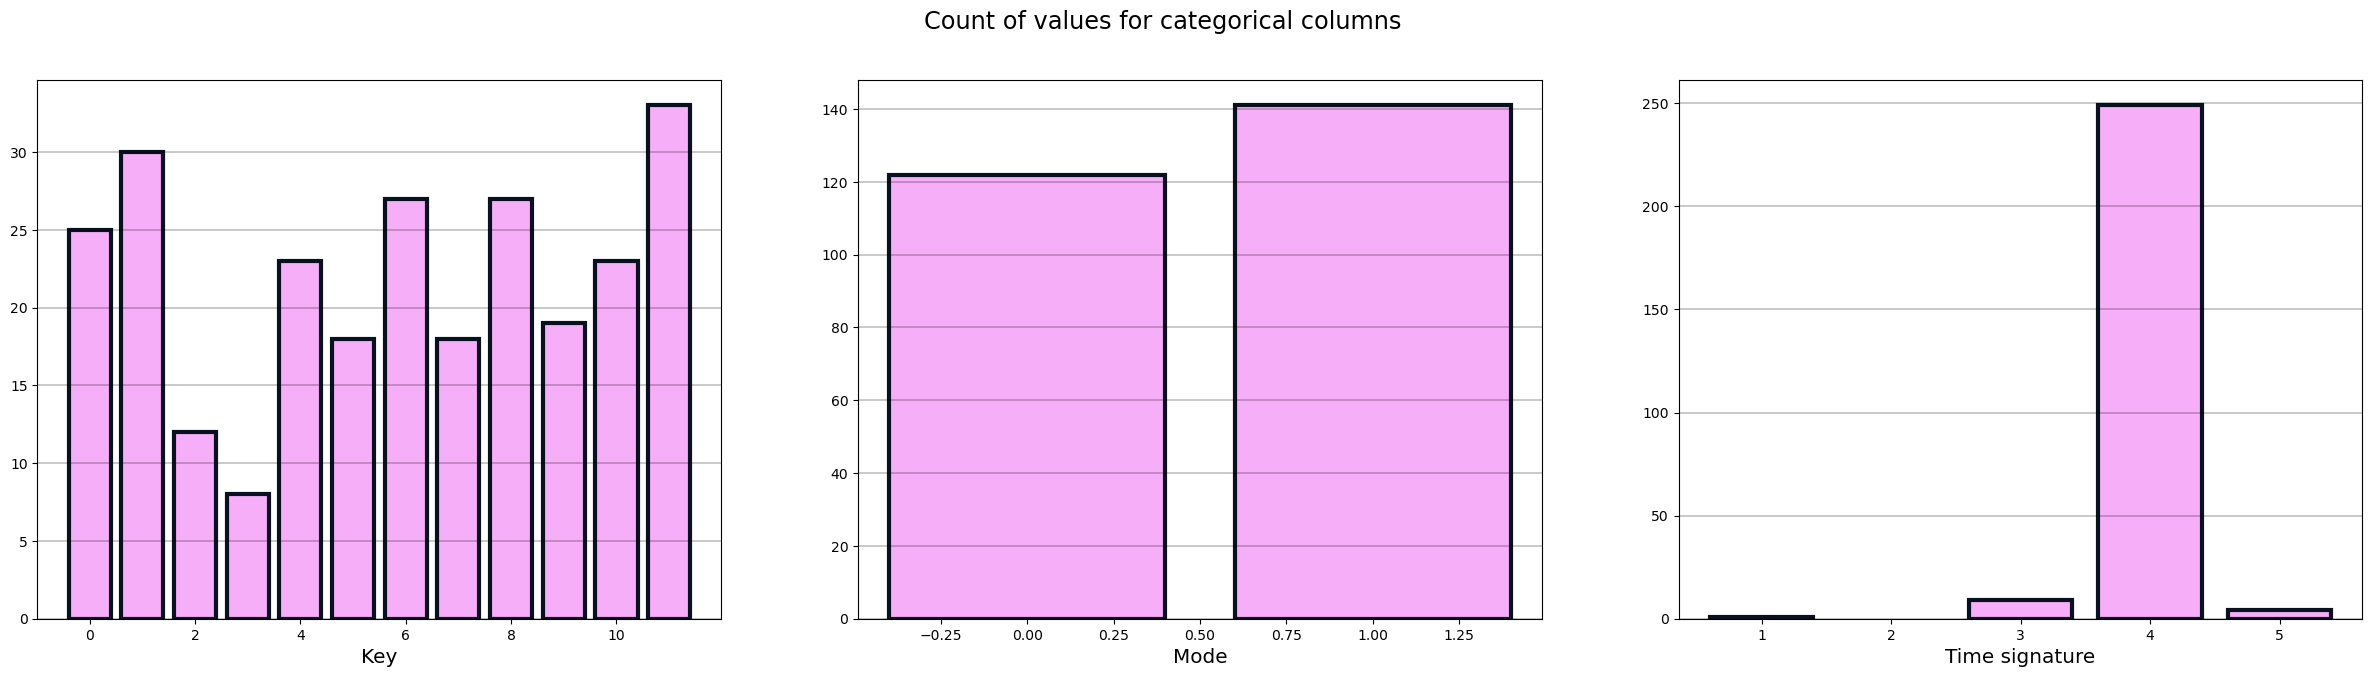

In [149]:
cols = ['key', 'mode', 'time_signature']

fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):
    count(df, col, ax[i])
    
fig.suptitle("Count of values for categorical columns", size="xx-large")
plt.show()

## Correlation with track_pop

In [151]:
df.loc[df["track_pop"] == 0,'track_pop'] = df['track_pop'].mean() 

/var/folders/nz/cjvjthd56496v3jdms0hks740000gn/T/ipykernel_29239/3221457905.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59.844106463878326' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["track_pop"] == 0,'track_pop'] = df['track_pop'].mean()


In [152]:
def scatter(df, x, y, ax, main_color=colors[1], second_color=colors[0]):
    sns.regplot(data=df, 
                x=x, 
                y=y, 
                ax=ax, 
                color=main_color, 
                ci=75,
                scatter_kws={
                    'edgecolor':second_color,
                    'linewidths':1.5,
                    's':50
                },
                line_kws={
                    'color':colors[2],
                    'linewidth':3,
                }
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())
    
    sns.despine(ax=ax)
    ax.grid(axis='x')

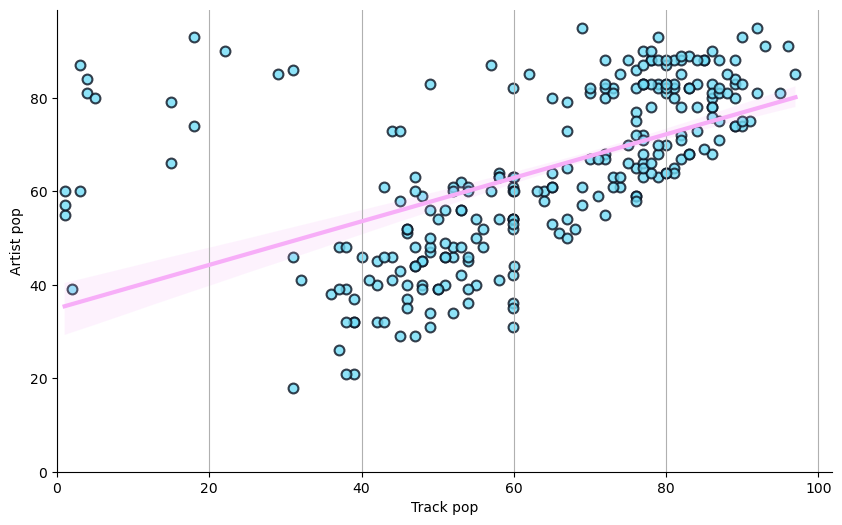

In [153]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter(df, 'track_pop', 'artist_pop', ax)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.show()

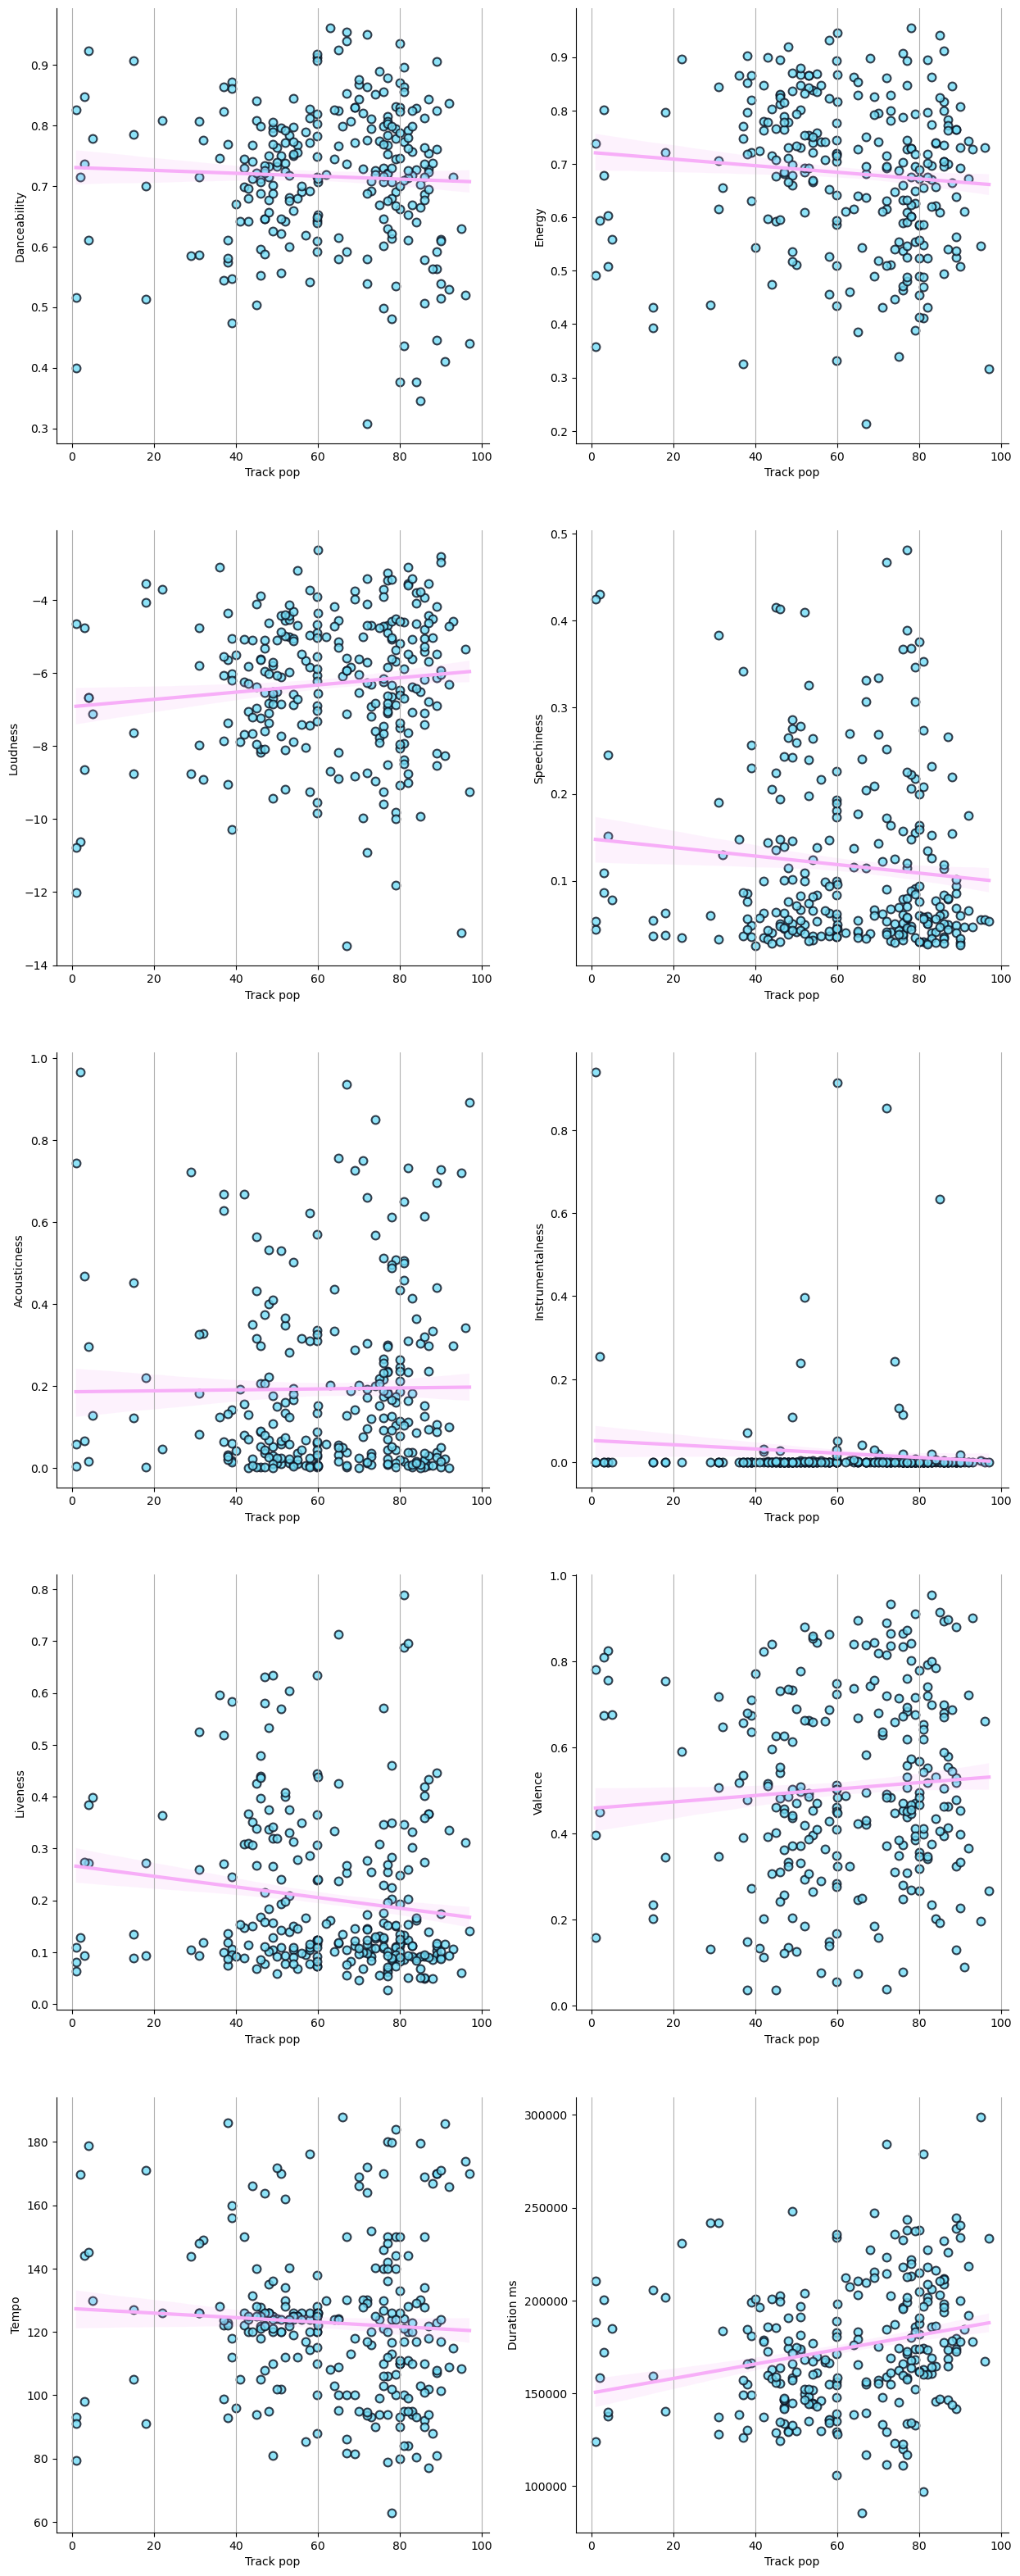

In [161]:
cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(5, 2, figsize=(15, 40))

for i, col in enumerate(cols):
    
    row_index = i // 2
    col_index = i % 2
    
    ax = axs[row_index][col_index]
    
    scatter(df, 'track_pop', col, ax)
    

plt.show()

In [162]:
def stripplot(df, x, y, ax, palette=None, edgecolor=colors[0]):
    sns.stripplot(
        data=df,
        x=x,
        y=y,
        hue=x,
        palette=palette,
        dodge=False,
        ax=ax,
        linewidth=2,
        size=8,
        legend=False,
        edgecolor=edgecolor
    )

    sns.despine(ax=ax)
    ax.grid(axis='y', linewidth=0.3, color='black')
    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("Track Popularity", fontsize="x-large")


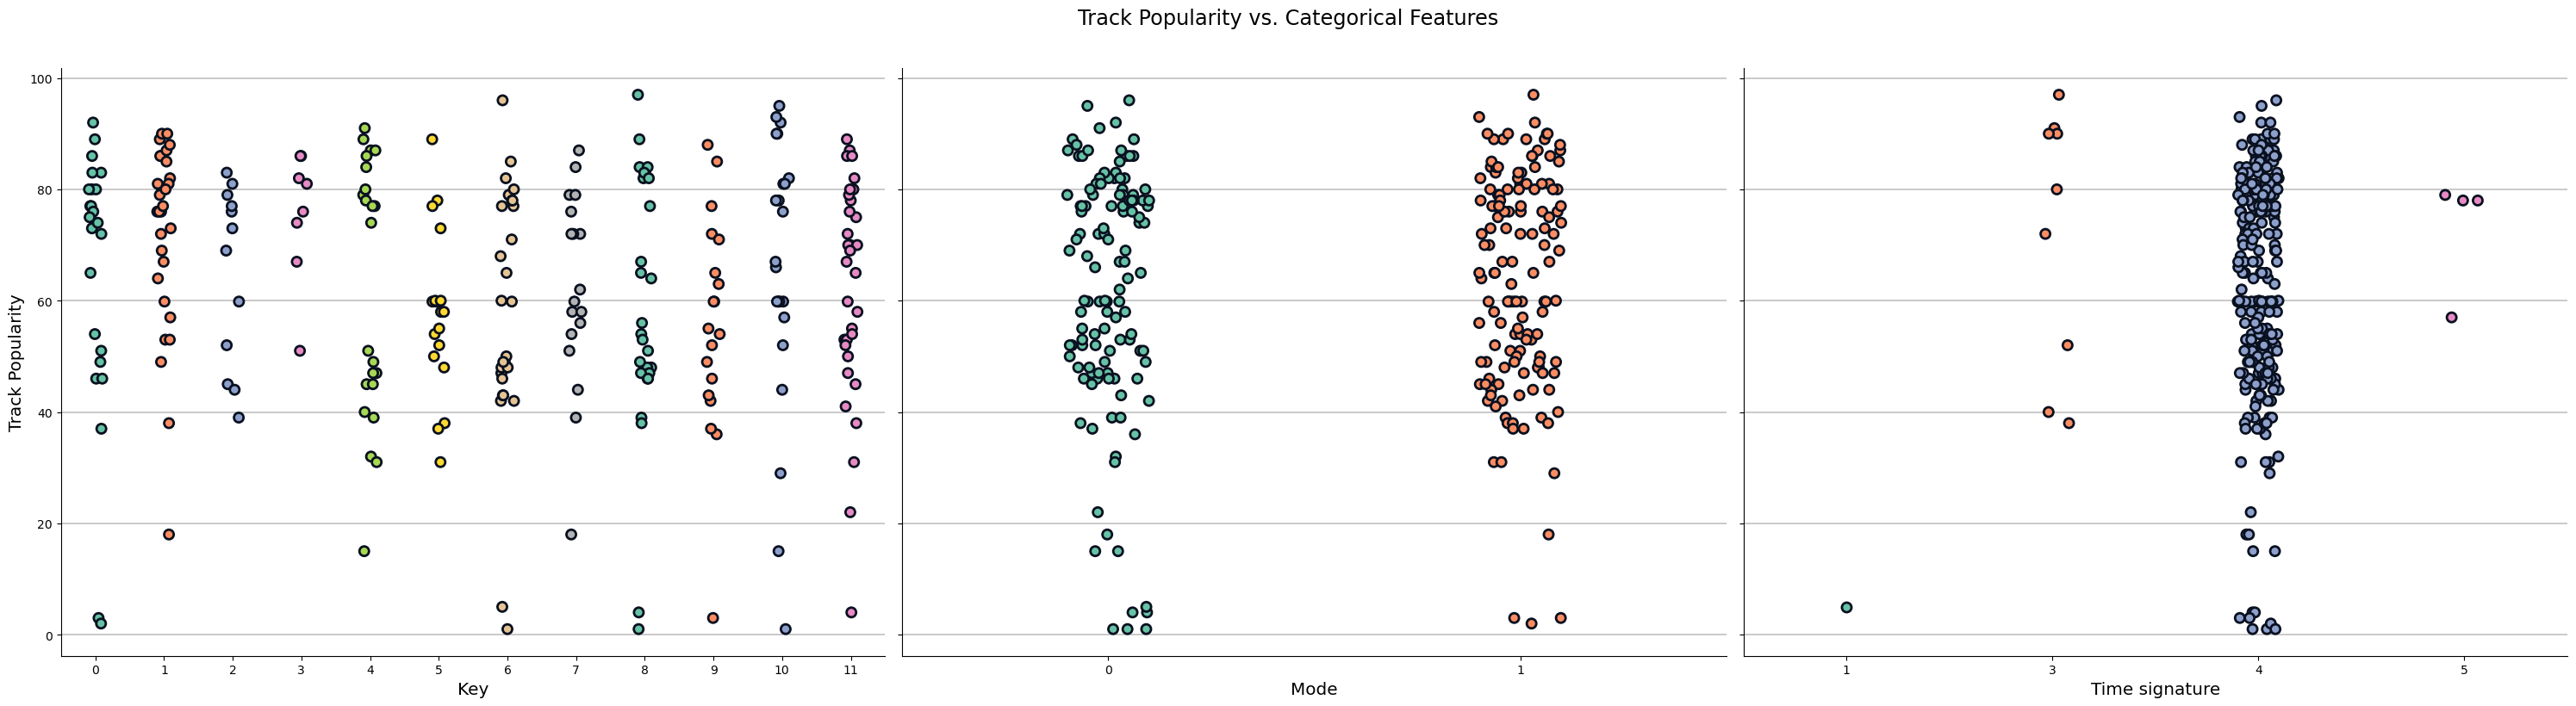

In [163]:
fig, axs = plt.subplots(1, 3, figsize=(30, 8), sharey=True)

cols = ['key', 'mode', 'time_signature']

for i, col in enumerate(cols):
    stripplot(df, col, 'track_pop', axs[i], palette='Set2')

fig.suptitle("Track Popularity vs. Categorical Features", fontsize="xx-large", y=1.02)
plt.tight_layout()
plt.show()


In [164]:
def corr_map(df, ax, palette, edgecolor=colors[0]):
    df_numeric = df.select_dtypes(include=['number'])
    corr = df_numeric.corr()
    
    sns.heatmap(
        corr, annot=True, ax=ax,
        cmap=palette, square=True,
        linewidth=0.5, linecolor=edgecolor,
        vmin=-1, vmax=1, fmt=".2f",
        annot_kws={"fontsize": 10}
    )

    sns.despine(ax=ax)
    ax.set_title("Correlation Matrix", fontsize="xx-large", pad=20)
    ax.tick_params(axis='both', labelsize=12)


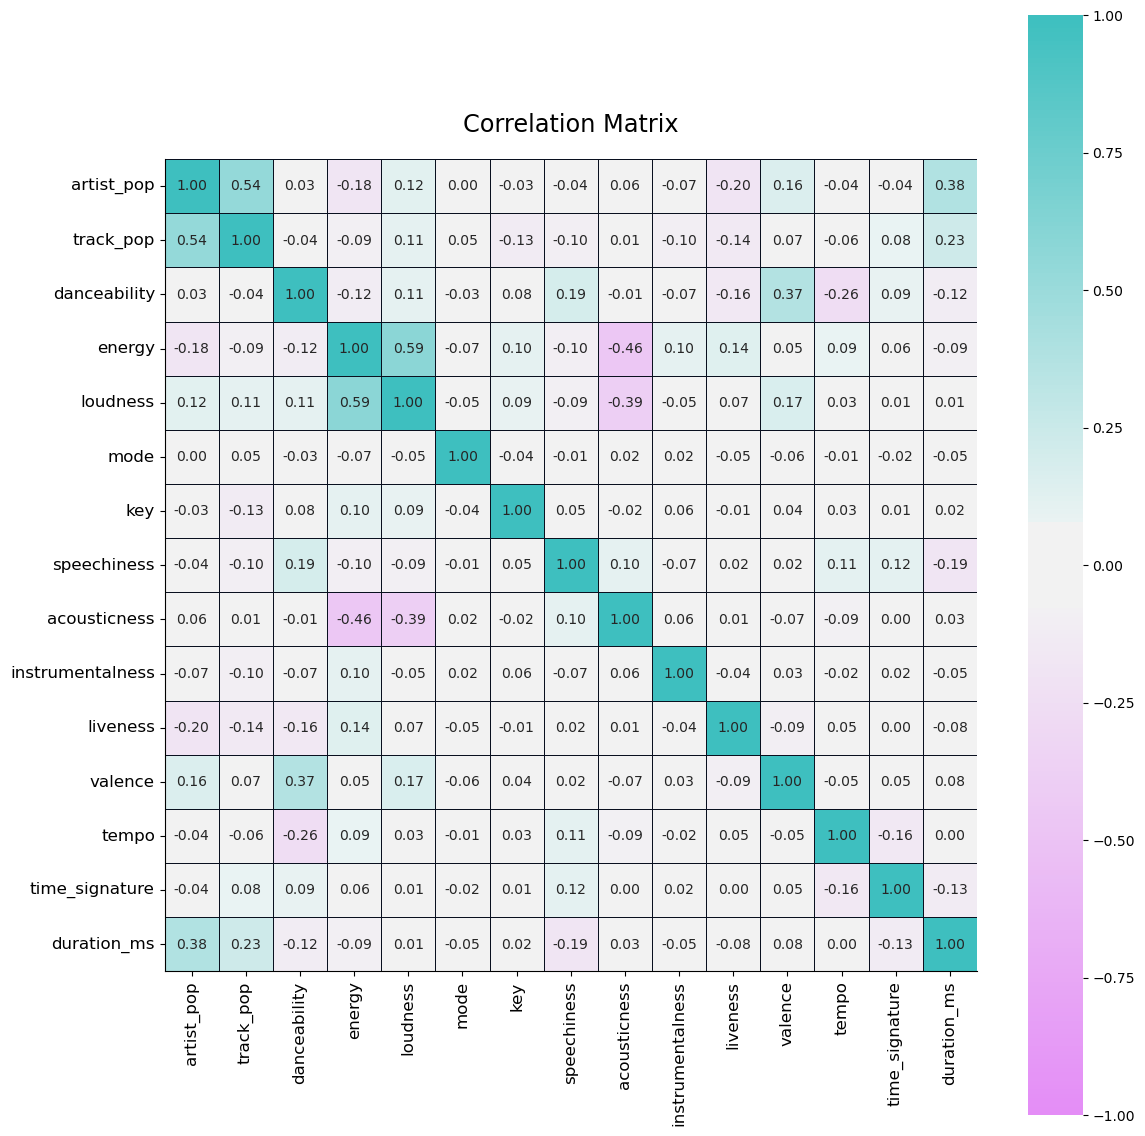

In [167]:
fig, ax = plt.subplots(figsize=(12, 12))

palette = sns.diverging_palette(299, 192, s=89, l=71, as_cmap=True, sep=20)

corr_map(df, ax, palette)

plt.tight_layout()
plt.show()


## the best artists and most popular tracks

In [175]:
# 1 - Top 3 artists for popularity

artists_pop_sorted = df.loc[:, ['artist_name', 'artist_pop']].drop_duplicates('artist_name').sort_values('artist_pop', ascending=False)

artists_pop_sorted[:3]

,artist_name,artist_pop
220,Drake,95
114,The Weeknd,93
1,Harry Styles,91


In [176]:
# 2 - Top 3 artists with more hits on tiktok in 2022

artists_top_hits = df['artist_name'].value_counts(ascending=False)

artists_top_hits[:3]

artist_name
Doja Cat     8
Coopex       6
Dame Dame    5
Name: count, dtype: int64

In [179]:
# 3 - Top 5 track for popularity

tracks_pop_sorted = df.loc[:, ['track_name', 'track_pop']].sort_values('track_pop', ascending=False)

tracks_pop_sorted[:5]

,track_name,track_pop
5,Glimpse of Us,97.0
1,As It Was,96.0
0,Running Up That Hill (A Deal With God),95.0
52,Late Night Talking,93.0
260,Jimmy Cooks (feat. 21 Savage),92.0


## Predict

#### Preprocessing

In [186]:
X = df.drop(['track_pop', 'track_name', 'album', 'artist_name', 'instrumentalness'], axis=1).values
y = df['track_pop'].values

SEED = 15

In [188]:
bin_numbers = pd.qcut(
    x=y, q=5, labels=False, duplicates='drop'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.25, 
                                                    stratify=bin_numbers)

In [190]:
ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [192]:
def error_plot(x_parameter, train_rmse, test_rmse, ax, 
               xlabel=None, title=None, xscale='linear', xlim=None, 
               train_color=colors[1], test_color=colors[2], train_std=None):
    
    ax.plot(x_parameter, train_rmse, color="black", linewidth=4,  marker="o")
    ax.plot(x_parameter, train_rmse, label='Train', color=train_color, linewidth=3,  marker="o")
    
    ax.plot(x_parameter, test_rmse, color="black", linewidth=4, marker="o")
    ax.plot(x_parameter, test_rmse, label='Test', color=test_color, linewidth=3, marker="o")
    
    if train_std:
        ax.fill_between(x_parameter, 
                        np.add(train_rmse, train_std), # train rmse + train std
                        np.add(train_rmse, -np.array(train_std)), # train rmse - train std 
                        alpha=0.05, color=train_color)

    ax.set(xlabel=xlabel, ylabel='RMSE', xscale=xscale, xlim=xlim, ylim=0, title=title)
    ax.grid()
    ax.legend()

#### Lasso

In [195]:
alphas = np.power(10.0, np.arange(-4, 4.1, 1))
train_rmse = []
train_std = []
test_rmse = []

for i, alpha in enumerate(alphas):
    lasso = Lasso(alpha=alpha, random_state=SEED)
    
    cv = -cross_val_score(lasso, X_train, y_train, cv=4, scoring="neg_mean_absolute_error")
    
    lasso.fit(X_train, y_train)
    
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    
    train_rmse.append(MSE(y_train, y_train_pred)**0.5)
    train_std.append(np.std(cv))
    test_rmse.append(MSE(y_test, y_test_pred)**0.5)
    
for i, alpha in enumerate(alphas):
    print("--"*10, f" alpha={round(alpha, 4)} ", "--"*10)
    print(f"TRAIN RMSE -> {round(train_rmse[i], 2)}")
    print(f"TEST RMSE -> {round(test_rmse[i], 2)}")

--------------------  alpha=0.0001  --------------------
TRAIN RMSE -> 17.13
TEST RMSE -> 17.37
--------------------  alpha=0.001  --------------------
TRAIN RMSE -> 17.13
TEST RMSE -> 17.37
--------------------  alpha=0.01  --------------------
TRAIN RMSE -> 17.13
TEST RMSE -> 17.38
--------------------  alpha=0.1  --------------------
TRAIN RMSE -> 17.19
TEST RMSE -> 17.38
--------------------  alpha=1.0  --------------------
TRAIN RMSE -> 17.66
TEST RMSE -> 16.51
--------------------  alpha=10.0  --------------------
TRAIN RMSE -> 17.92
TEST RMSE -> 16.62
--------------------  alpha=100.0  --------------------
TRAIN RMSE -> 18.91
TEST RMSE -> 17.98
--------------------  alpha=1000.0  --------------------
TRAIN RMSE -> 20.46
TEST RMSE -> 19.85
--------------------  alpha=10000.0  --------------------
TRAIN RMSE -> 20.46
TEST RMSE -> 19.81


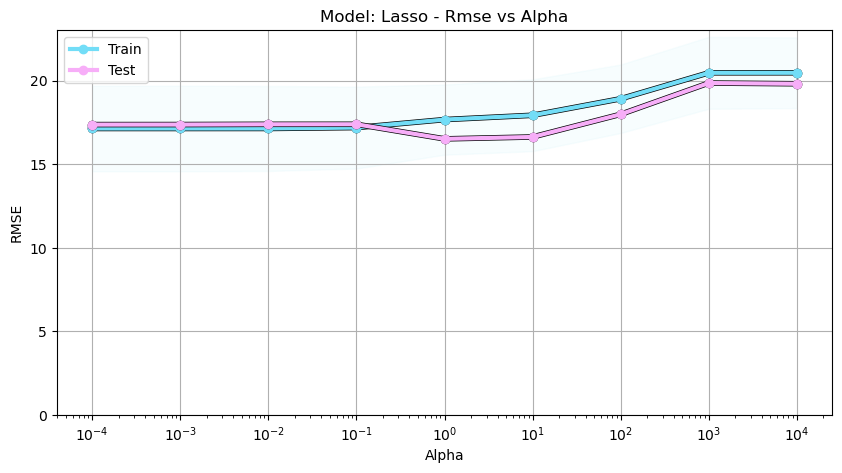

In [197]:
fig, ax = plt.subplots(figsize=(10,5))  

error_plot(alphas, train_rmse, test_rmse, ax, 
           xscale='log', xlabel='Alpha', 
           train_std=train_std, 
          title="Model: Lasso - Rmse vs Alpha")
plt.show()

#### SVR

In [200]:
param_grid = {
            'C': [0.1, 1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']
            }

svr = SVR()

svr_gs = GridSearchCV(
    svr, param_grid,
    cv=4, n_jobs=-1, verbose=1, scoring="neg_mean_absolute_error"
)

svr_gs.fit(X_train_scaled, y_train)

print(f"Best Parameters -> {svr_gs.best_params_ }")

print(f"Best Score -> {-round(svr_gs.best_score_,2)}")

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters -> {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score -> 11.35


In [201]:
svr_df = pd.DataFrame(svr_gs.cv_results_)

svr_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003496,0.001605,0.000904,0.000273,0.1,1.0,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",-17.832438,-15.912317,-15.165532,-19.741269,-17.162889,1.778321,35
1,0.004730,0.000822,0.001140,0.000360,0.1,1.0,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",-20.995754,-13.924204,-15.122004,-25.437561,-18.869881,4.641122,41
2,0.001569,0.000989,0.000676,0.000371,0.1,1.0,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",-15.885863,-13.829910,-13.411178,-18.360936,-15.371972,1.963458,15
3,0.001207,0.000637,0.000729,0.000360,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",-17.591648,-15.661133,-14.967474,-19.526720,-16.936744,1.777785,23
4,0.001250,0.000579,0.000569,0.000205,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",-17.419845,-15.578939,-14.850316,-19.256316,-16.776354,1.710827,21


In [202]:
svr_df["mean_test_score"] = -svr_df["mean_test_score"]

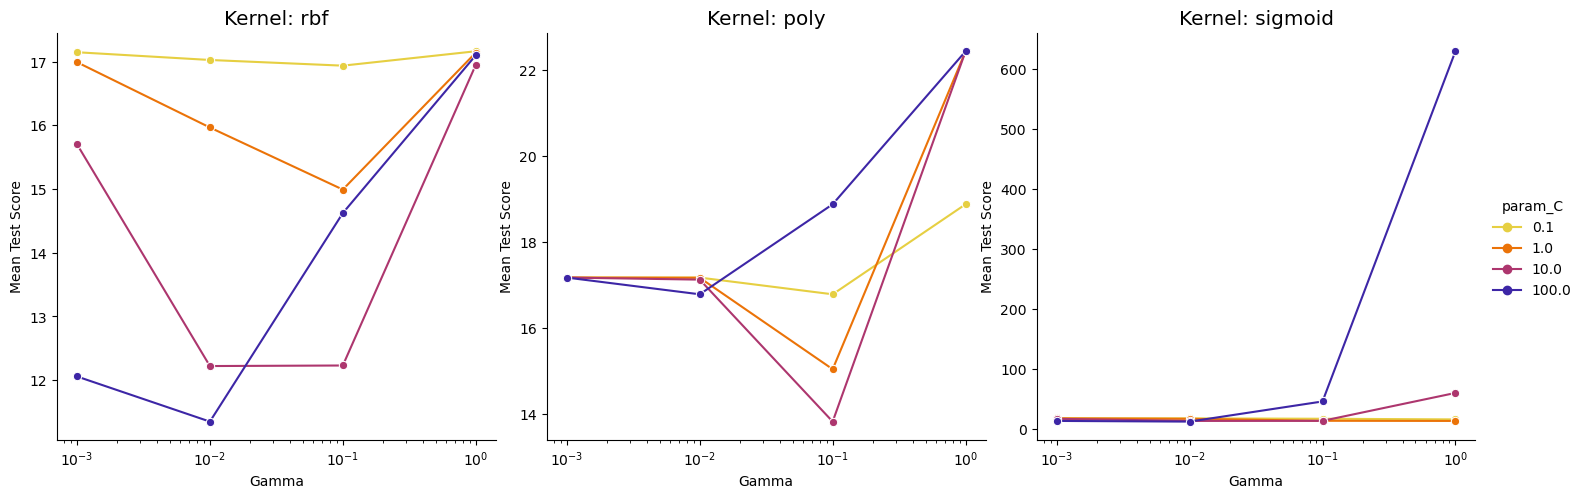

In [203]:
params_palette = sns.color_palette("CMRmap_r", n_colors=4)

g = sns.relplot(data=svr_df, x="param_gamma", y="mean_test_score", hue="param_C", col="param_kernel", 
                kind="line", facet_kws={"sharey":False},
                palette=params_palette, marker="o")

g.set(xscale="log", xlabel="Gamma", ylabel="Mean Test Score")
g.set_titles(col_template="Kernel: {col_name}", size="x-large")

plt.show()

In [204]:
best_svr_est = svr_gs.best_estimator_

best_svr_est.fit(X_train_scaled, y_train)

y_pred_train = best_svr_est.predict(X_train_scaled)
y_pred_test = best_svr_est.predict(X_test_scaled)

print(f"Train RMSE -> {MSE(y_train, y_pred_train)**0.5}")
print(f"Test RMSE -> {MSE(y_test, y_pred_test)**0.5}")

Train RMSE -> 16.710782987215826
Test RMSE -> 16.92909326738247


#### Gradient Boosting

In [206]:
params_grid = {
    "learning_rate":np.arange(0.1, 0.5, 0.05),
    "n_estimators":np.arange(40, 201, 20),
    "subsample":np.arange(0.4, 1.01, 0.1),
    "min_samples_split":np.arange(2, 10, 1),
    "min_samples_leaf":np.arange(2, 10, 1)
}
est = GradientBoostingRegressor(random_state=SEED, max_depth=1)

In [207]:
gb_rs = RandomizedSearchCV(
    estimator=est,
    param_distributions=params_grid,
    n_iter=50,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1, 
    random_state=SEED
)

In [208]:
gb_rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(max_depth=1,
                                                       random_state=15),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 40,  60,  80, 100, 120, 140, 160, 180, 200]),
                                        'subsample': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=15, scoring='neg_mean_absolute_error',
                   verbose=1)

In [212]:
print(f"Best Parameters -> {gb_rs.best_params_ }")

print(f"Best Score -> {-round(gb_rs.best_score_,2)}")

Best Parameters -> {'subsample': 0.9999999999999999, 'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 7, 'learning_rate': 0.1}
Best Score -> 12.64


In [213]:
best_estimator = gb_rs.best_estimator_

best_estimator.fit(X_train, y_train)

y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print(f"Train RMSE -> {MSE(y_train, y_pred_train)**0.5}")
print(f"Test RMSE -> {MSE(y_test, y_pred_test)**0.5}")

Train RMSE -> 16.669759896486813
Test RMSE -> 16.533186569741336


In [232]:
import joblib

joblib.dump(best_svr_est, "model.pkl")

['model.pkl']

In [234]:
joblib.dump(ss, "scaler.pkl")

['scaler.pkl']